# MC vs signal peak of data
*(not used in the report because the $_s$Weights don't look good)*

Goal: Compare the MC BDT distribution and the sWeighted BDT distribution

In [1]:
name_BDT = 'gradient'
name_data = 'common_B0TODst3pi_Dst_constr_sWeights_BDT'
var = 'Dst_constr_B0_M'

In [2]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, load_saved_root, add_constr_Dst
import plot.histogram as h
from plot.tool import save_file

Welcome to JupyROOT 6.22/02


## Load the BDT output to the `MC` data and the `common` data

In [3]:
df = {}

In [6]:
df['common'] = load_saved_root(name_data, name_folder='common', vars=['tau_M', 'BDT', 'Dst_constr_B0_M'])

/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common/common_B0TODst3pi_Dst_constr_sWeights_BDT.root


In [5]:
df['MC_BDT'] = load_saved_root('MC_'+ name_BDT, name_folder='MC')

/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/MC/MC_gradient.root


### BDT output

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT_data


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Candidates / (0.187)'>)

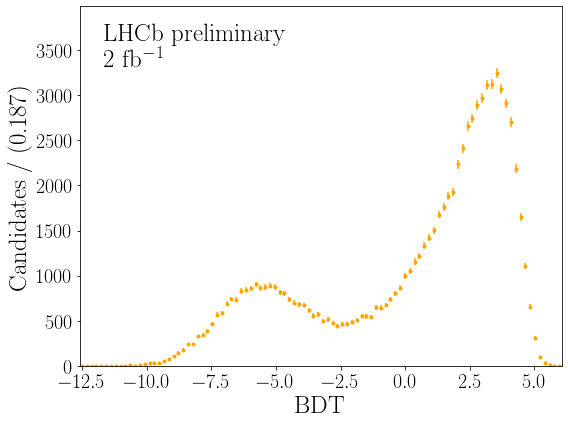

In [7]:
h.plot_hist_particle({'data': df['common'].query('Dst_constr_B0_M > 5150 and Dst_constr_B0_M < 5570')},'BDT',
              n_bins = 100, mode_hist = False, colors=['orange'], pos_text_LHC=[0.05,0.95,'left'])

## $_s$Weighted distributions of $m(3\pi)$ and $BDT$ (consistency check)

### $m(3\pi)$

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_common_B0TODst3pi_Dst_constr_sWeights_BDT


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (2e+02 MeV/$c^2$)'>)

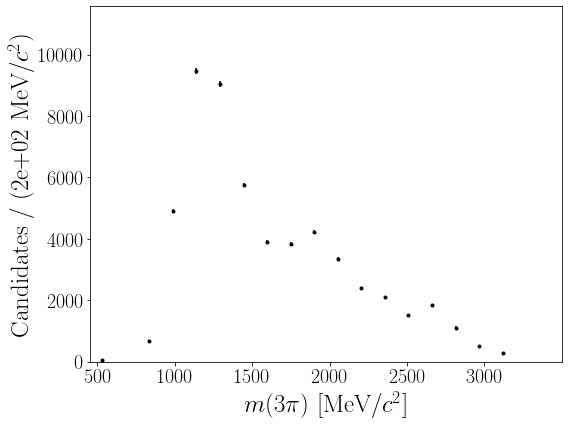

In [6]:
h.plot_hist_particle({name_data:df['common']}, 'tau_M',
          n_bins = 20, mode_hist = False, colors='black', weights=df['common']['sWeight'])

### BDT distribution

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT_common_B0TODst3pi_Dst_constr_sWeights_BDT


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Candidates / (0.6)'>)

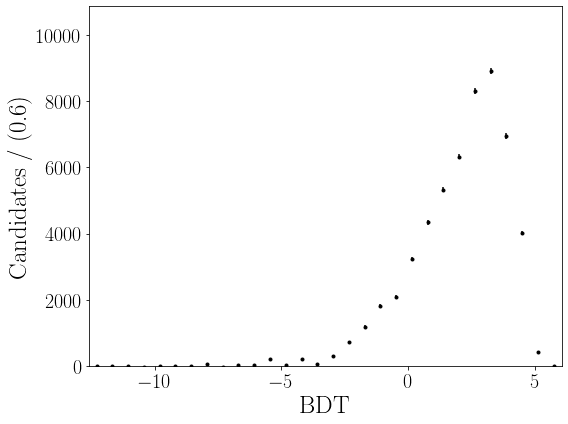

In [7]:
h.plot_hist_particle({name_data:df['common'], }, 'BDT',
          n_bins = 30, mode_hist = False, colors='black', weights=df['common']['sWeight'])

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT_LHCb_data_Signal_peak_of_the_LHCb_data


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Candidates / (0.6)'>)

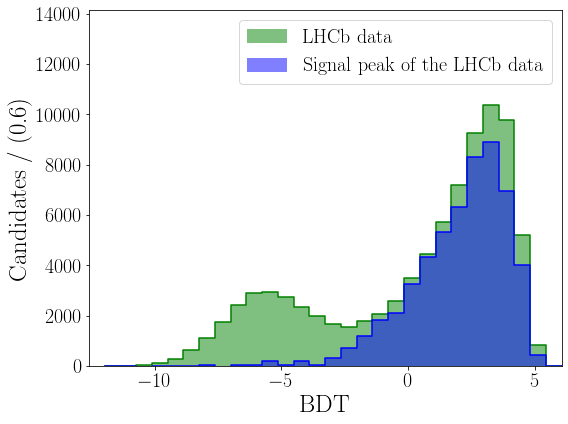

In [8]:
h.plot_hist_particle({'LHCb data':df['common'], 'Signal peak of the LHCb data':df['common']}, 'BDT',
          n_bins = 30, mode_hist = True, colors=['g', 'b'], weights=[None,df['common']['sWeight']],
                    density=False, label_ncounts=False)

## BDT distribution of the $_s$Weighted `common` data vs `MC` data

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:65: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/BDT_MC_data_Signal_peak_of_the_LHCb_data


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Proportion of candidates / (0.6)'>)

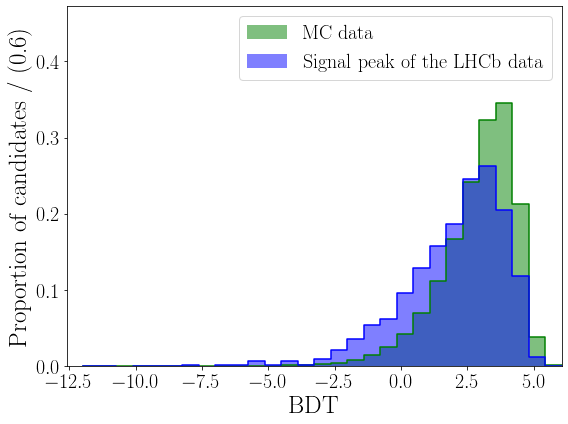

In [9]:
h.plot_hist_particle({'MC data':df['MC_BDT'], 'Signal peak of the LHCb data':df['common']}, 'BDT',
          n_bins = 30, mode_hist = True, colors=['g', 'b'], weights=[None,df['common']['sWeight']],
                    label_ncounts=False)